## Run the script cell by cell to see the progress

This script reproduces generate_image function from gc/run.py and get_words function from gc/crawl.py which is included in it.

In [177]:
import numpy as np
from sklearn.cluster import k_means
import requests
from urllib.parse import quote
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from collections import Counter
import threading 
from PIL import Image, ImageFilter
from PIL import ImageDraw, ImageFont, ImageOps
from math import floor, ceil
import sys
sys.path.append('gc/')

In [222]:
from crawl import get_images, get_links, get_soup, get_cumulative_palette, clean_text, cook_soup
from src import Canvas, Droplet

In [179]:
# Helper functions for text transformation
def upper(w):
    return w.upper()
def lower(w):
    return w.lower()
def cap(w):
    return w[:1].upper()+w[1:].lower()
def rand(w):
    t = [upper,lower,cap][np.random.randint(0,3)]
    return t(w)

I will be creating hi-res poster for Galvanize here in this example
using custom file mask instead of a word.

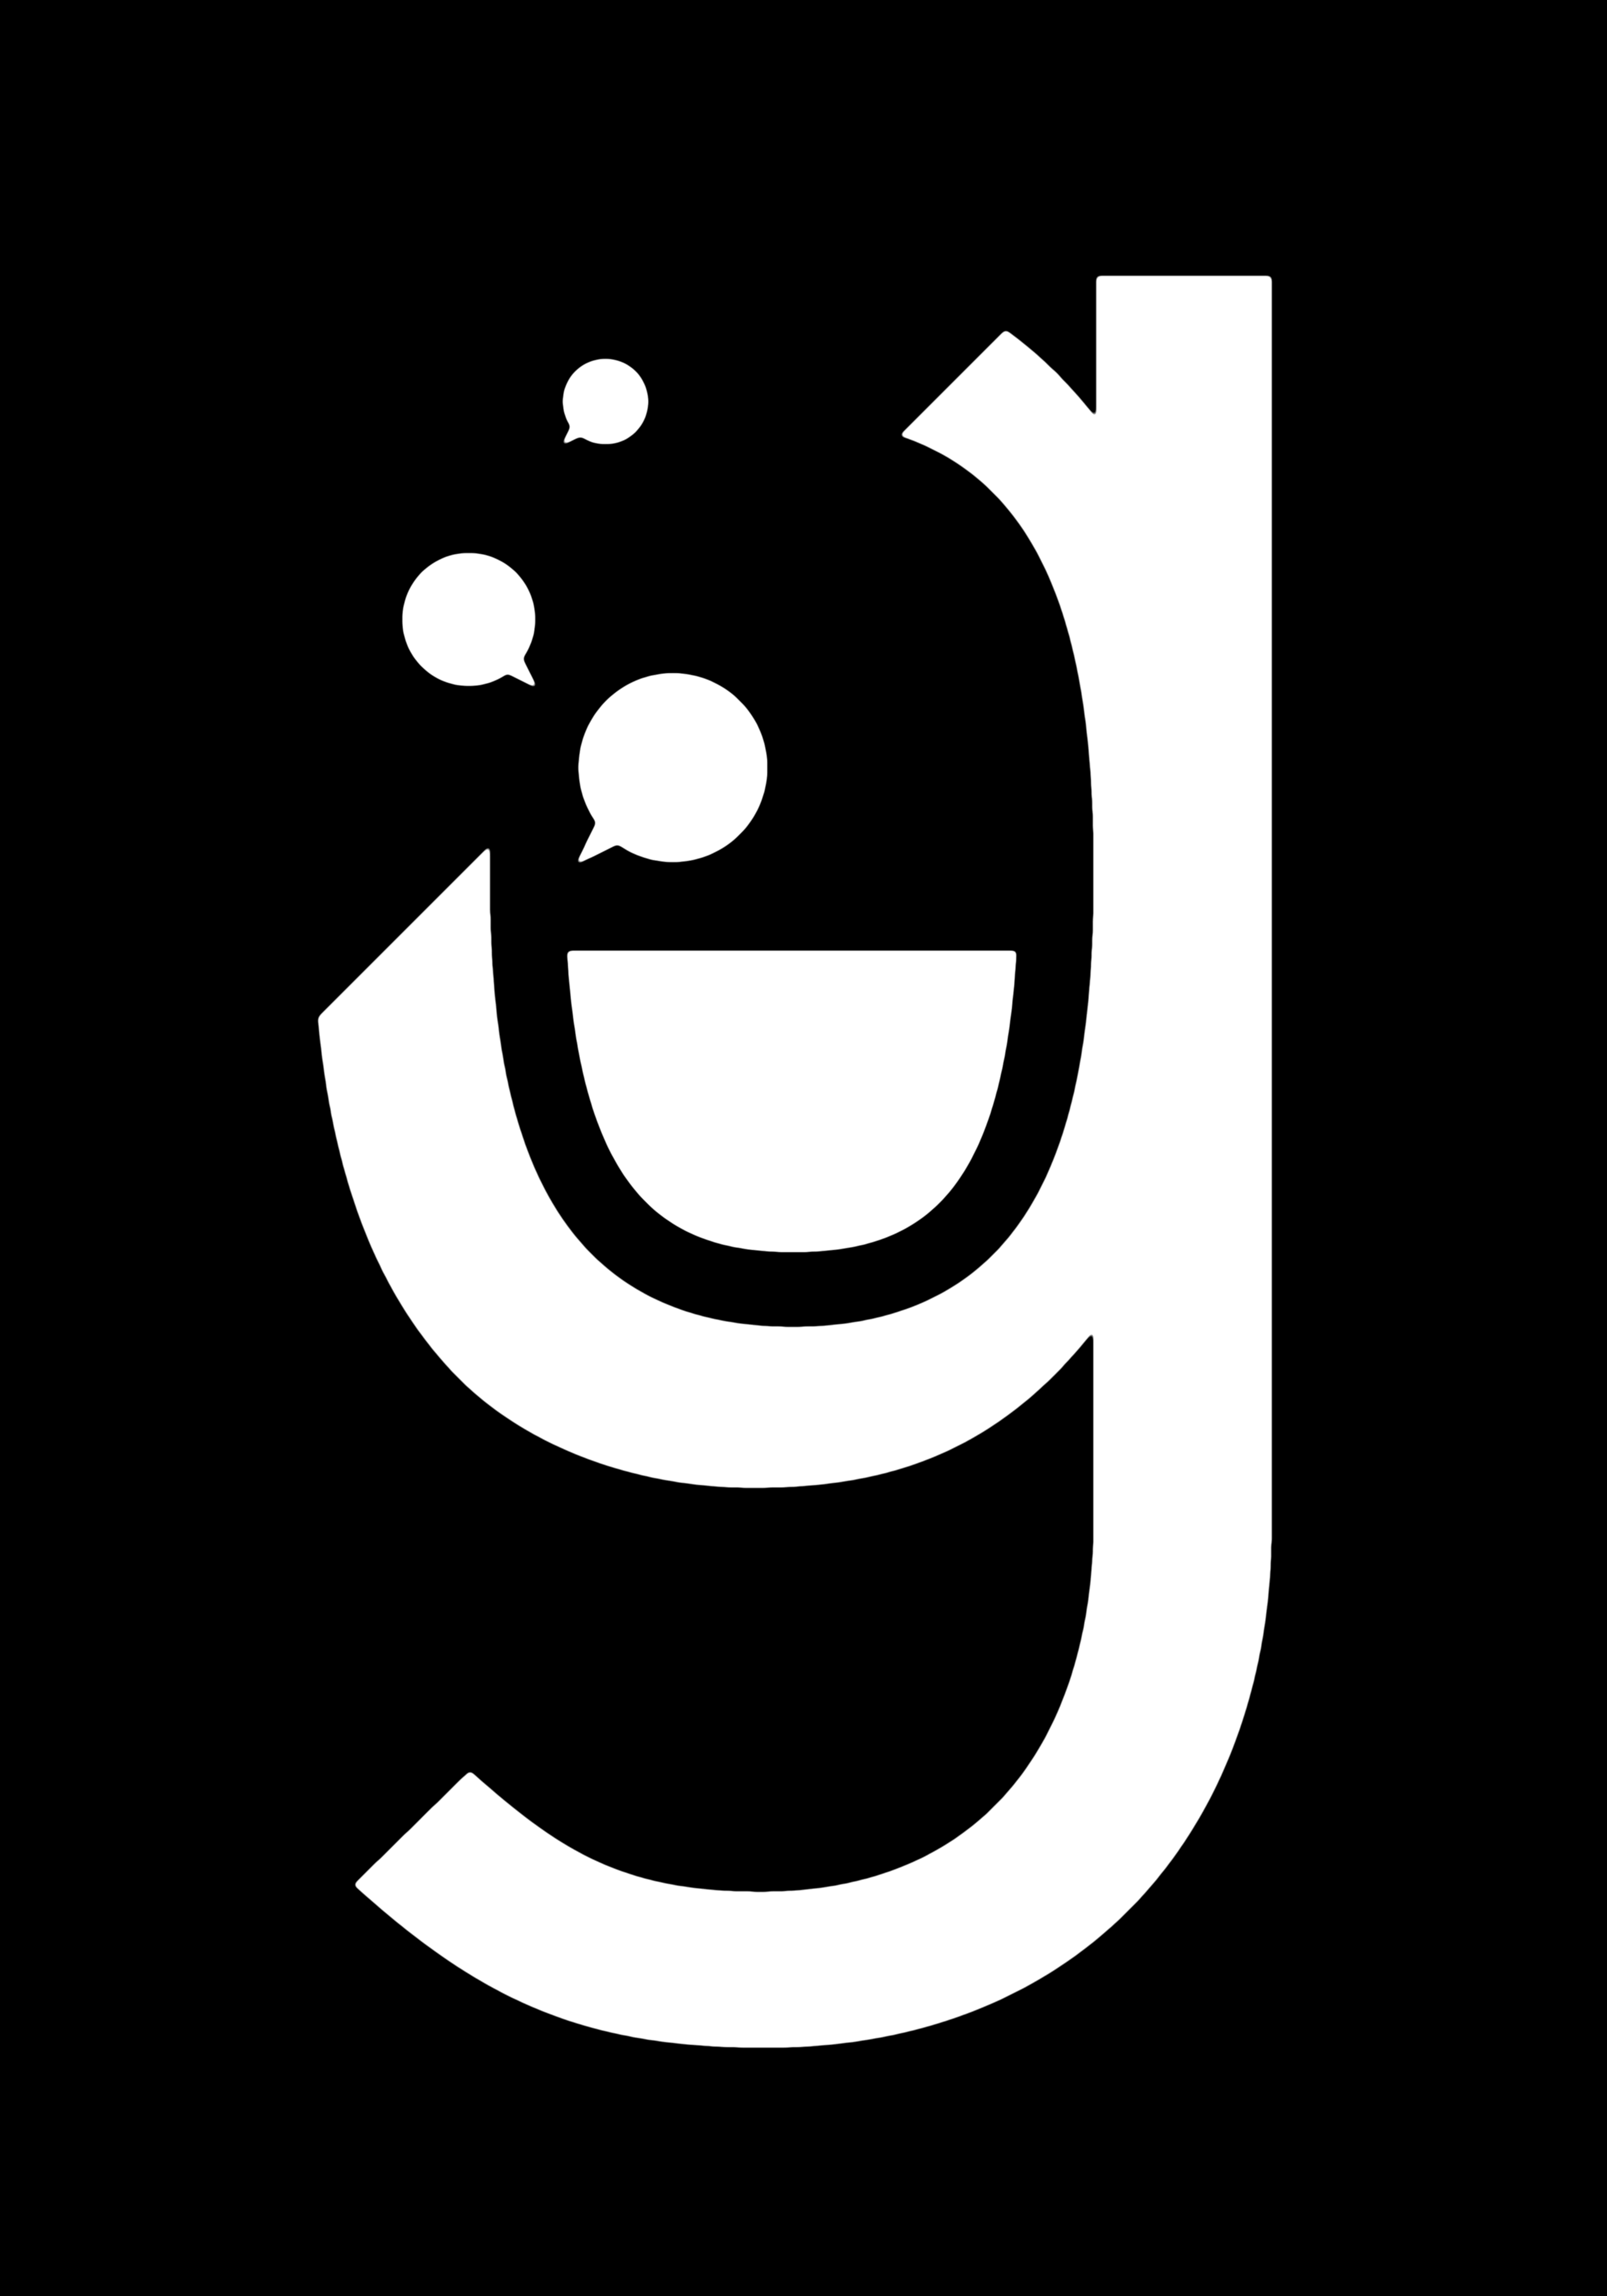

In [180]:
img = Image.open('images/g_mask.png')
img

Dummy dictionary imitating actual user input

In [249]:
form = { 
    'concept':'galvanize', #central concept 
    'clarify': 'data science bootcamp',     #clarifying keywords
    'mask':True,      #whether to map inside or outside the word
    'style': 'minimal', #one of preset styles
    'inverted': True,    #dark (True) or light(False) background
    'im_width':1750,
    'im_height':2500, #dimensions
}

In [182]:
w, h = int(form['im_width']), int(form['im_height'])

By how much the mask will be smaller than the actual image. This parameter is needed for better speed as the best position calculation is done on the mask. 
Smaller values -> bigger compression -> faster -> worse quality

In [183]:
if form['mask']: 
    reducer = 1000
else:
    reducer = 500

Define region in fraction of the full canvas to look for a best place for word at a time. The script gradually cycles through those looking for a place to insert the text.

In [184]:
partial = (0.35,1) if form['mask'] else (0.5,0.5)

Colors from dark to light or vice versa

In [250]:
if form['inverted']:
    inverter = -1
else:
    inverter = 1

Preset dictionary of font and text styles

In [186]:
styles = {
    'classic' : { 'fonts': [ 'cloistrk','lucian','raleigh'], 
                 'invert':['belwe','raleigh'], 
                 'transform': [cap] },
    'minimal' : { 'fonts': [ 'geometr', 'myriadpro','futura'],
                 'invert':[ 'geometr'],
                 'transform':[upper]},
    'grunge' : { 'fonts': ['distress', 'pantspatrol','polaroid','eklektic'], 
                'invert':['distress','polaroid'],
                'transform':[upper,lower]}
}
style = styles[form['style']]

In [187]:
fonts_to_use = np.array(['fonts/'+name+'.ttf' for name in style['fonts']])
fonts_to_use[np.argwhere(fonts_to_use=="fonts/myriadpro.ttf")] = "fonts/myriadpro.otf"

if form['mask']:
    fonts_header = ['fonts/'+name+'.ttf' for name in style['invert']]
else:
    fonts_header = [font for font in fonts_to_use if font != 'fonts/polaroid.ttf']

In [188]:
links, images_link = get_links(form['concept']+' '+form['clarify'])

In [223]:
from crawl import soups

In [224]:
threads = []

In [225]:
for ind,each in enumerate(links):
    soups.append("")
    threads.append(threading.Thread(target=get_soup, args=([each,ind])))
for num in range(0,len(threads)):
    threads[num].start()
for num in range(0,len(threads)):
    threads[num].join()

Exception in thread Thread-212:
Traceback (most recent call last):
  File "/home/hanna/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/hanna/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "gc/crawl.py", line 102, in get_soup
    response = requests.get(link.replace("https","http"), verify=False,timeout=1)
  File "/home/hanna/anaconda3/lib/python3.6/site-packages/requests/api.py", line 75, in get
    return request('get', url, params=params, **kwargs)
  File "/home/hanna/anaconda3/lib/python3.6/site-packages/requests/api.py", line 60, in request
    return session.request(method=method, url=url, **kwargs)
  File "/home/hanna/anaconda3/lib/python3.6/site-packages/requests/sessions.py", line 519, in request
    prep = self.prepare_request(req)
  File "/home/hanna/anaconda3/lib/python3.6/site-packages/requests/sessions.py", line 462, in prepare_request
    hooks=merge_hooks(reque

In [229]:
sw = set(stopwords.words('english'))
for each in ['also','loading',"ll","if","s","nt","...","..","re","m","-the","d","-i","––","--"]:
    sw.add(each)

In [231]:
contents = " ".join([clean_text(cook_soup(each)) for each in soups])

In [232]:
total_count = Counter([
    each for each in word_tokenize(contents.lower()) 
    if each not in list('0123456789#$+-@%.') and each not in sw])

In [234]:
words_in_order = [ 
    each[0] for each in total_count.most_common(len(total_count)) 
    if each[0] !=form['concept'].lower()]

In [228]:
words_in_order

['data',
 'science',
 'program',
 '2016',
 'answered',
 'course',
 'august',
 'learn',
 'graduate',
 'career',
 'instructors',
 'learning',
 'anonymous',
 'one',
 'get',
 'students',
 'immersive',
 'work',
 'people',
 'day',
 'experience',
 'time',
 'job',
 'help',
 'bootcamp',
 'python',
 'new',
 'like',
 'skills',
 'first',
 'make',
 'review',
 'questions',
 'web',
 'curriculum',
 'would',
 'cohort',
 'class',
 'tech',
 'bootcamps',
 'best',
 'courses',
 'online',
 'share',
 'scientist',
 'go',
 'programming',
 'business',
 'months',
 'development',
 'software',
 'start',
 'well',
 'need',
 'great',
 'know',
 'graduates',
 'take',
 'answer',
 'including',
 'free',
 'us',
 'instructor',
 'helpful',
 'much',
 'good',
 'things',
 'every',
 'however',
 'many',
 'stay',
 'admissions',
 'you’ll',
 'comment',
 'flag',
 'jobs',
 'weeks',
 'way',
 'services',
 'galvanize’s',
 'prep',
 '15th',
 'current',
 'knowledge',
 'community',
 'analytics',
 'projects',
 'hiring',
 'worth',
 'two',
 'it’

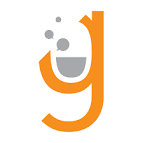

In [229]:
imgs = get_images(images_link)
imgs[0]

In [269]:
cmap = get_cumulative_palette(imgs)

gc/crawl.py:72: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  c = k_means(tmp.reshape(tmp.shape[0]*tmp.shape[1],3),16,init='random')
gc/crawl.py:72: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  c = k_means(tmp.reshape(tmp.shape[0]*tmp.shape[1],3),16,init='random')
gc/crawl.py:72: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  c = k_means(tmp.reshape(tmp.shape[0]*tmp.shape[1],3),16,init='random')
gc/crawl.py:72: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  c = k_means(tmp.reshape(tmp.shape[0]*tmp.shape[1],3),16,init='random')
gc/crawl.py:72: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (16). Possibly due to duplicate po

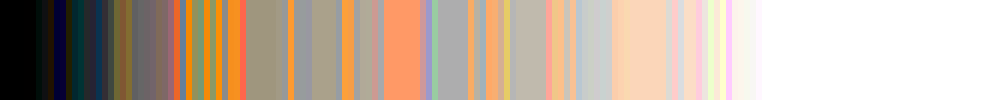

In [270]:
gr = Image.new("RGB", (1000,100),(255,255,255))
for ind,color in enumerate(cmap):
    tmp = Image.new("RGB", (6,100),tuple(color))
    gr.paste(tmp,(ind*6,0))
gr

Running k-means once again to find 'whites' and 'blacks' clusters and get rid of one of them depending if background is dark or light

In [271]:
color_bins = np.array([[0,0,0],[255,255,255],[255,0,0],[0,255,0],[0,0,255],[255,0,255],[0,255,255],[255,255,0]])
key_colors = k_means(cmap,8,init=color_bins)

if inverter==-1:
    fin_cmap = np.array(
        [tuple(np.mean(cmap[key_colors[1]==0],axis=0).astype(int))] +
        [ tuple(each) for each in cmap[key_colors[1]!=0] ])
    fin_cmap = fin_cmap[::-1]
else:
    fin_cmap = np.array(
        [ tuple(each) for each in cmap[key_colors[1]!=1] ] +
        [tuple(np.mean(cmap[key_colors[1]==1],axis=0).astype(int))])

fin_cmap = [ tuple(each) for each in fin_cmap ]

/home/hanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


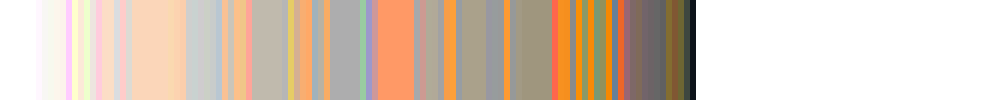

In [272]:
gr = Image.new("RGB", (1000,100),(255,255,255))
for ind,color in enumerate(fin_cmap):
    tmp = Image.new("RGB", (6,100),tuple(color))
    gr.paste(tmp,(ind*6,0))
gr

In [275]:
partial = (0.5,0.5)

In [276]:
image = Canvas(w,h,round(w/reducer),partial)
image.fit(form['concept'],fonts_header[np.random.randint(0,len(fonts_header))],invert=form['mask'],filemask='images/g_mask.png')

In [277]:
drops = []
stopper = 20 if form['mask'] else 27

for num,word in enumerate(words_in_order):
    tr = style['transform'][np.random.randint(0,len(style['transform']))]
    drops.append(Droplet(tr(word)))
    drops[-1].fit(fonts_to_use[np.random.randint(0,len(fonts_to_use))])
    #if the mask is very dense cycle can exit prematurely when cycling through central part
    if image.paste_object(drops[-1])<stopper:
        if image.paste_object(drops[-1])<stopper:
            if image.paste_object(drops[-1])<stopper:
                if image.paste_object(drops[-1])<stopper:
                    print('No more free space!')
                    break
    print("{} words placed".format(num+1))

1 words placed
2 words placed
3 words placed
4 words placed
5 words placed
6 words placed
7 words placed
8 words placed
9 words placed
10 words placed
11 words placed
12 words placed
13 words placed
14 words placed
15 words placed
16 words placed
17 words placed
18 words placed
19 words placed
20 words placed
21 words placed
22 words placed
23 words placed
24 words placed
25 words placed
26 words placed
27 words placed
28 words placed
29 words placed
30 words placed
31 words placed
32 words placed
33 words placed
34 words placed
35 words placed
36 words placed
37 words placed
38 words placed
39 words placed
40 words placed
41 words placed
42 words placed
43 words placed
44 words placed
45 words placed
46 words placed
47 words placed
48 words placed
49 words placed
50 words placed
51 words placed
52 words placed
53 words placed
54 words placed
55 words placed
56 words placed
57 words placed
58 words placed
59 words placed
60 words placed
61 words placed
62 words placed
63 words placed
6

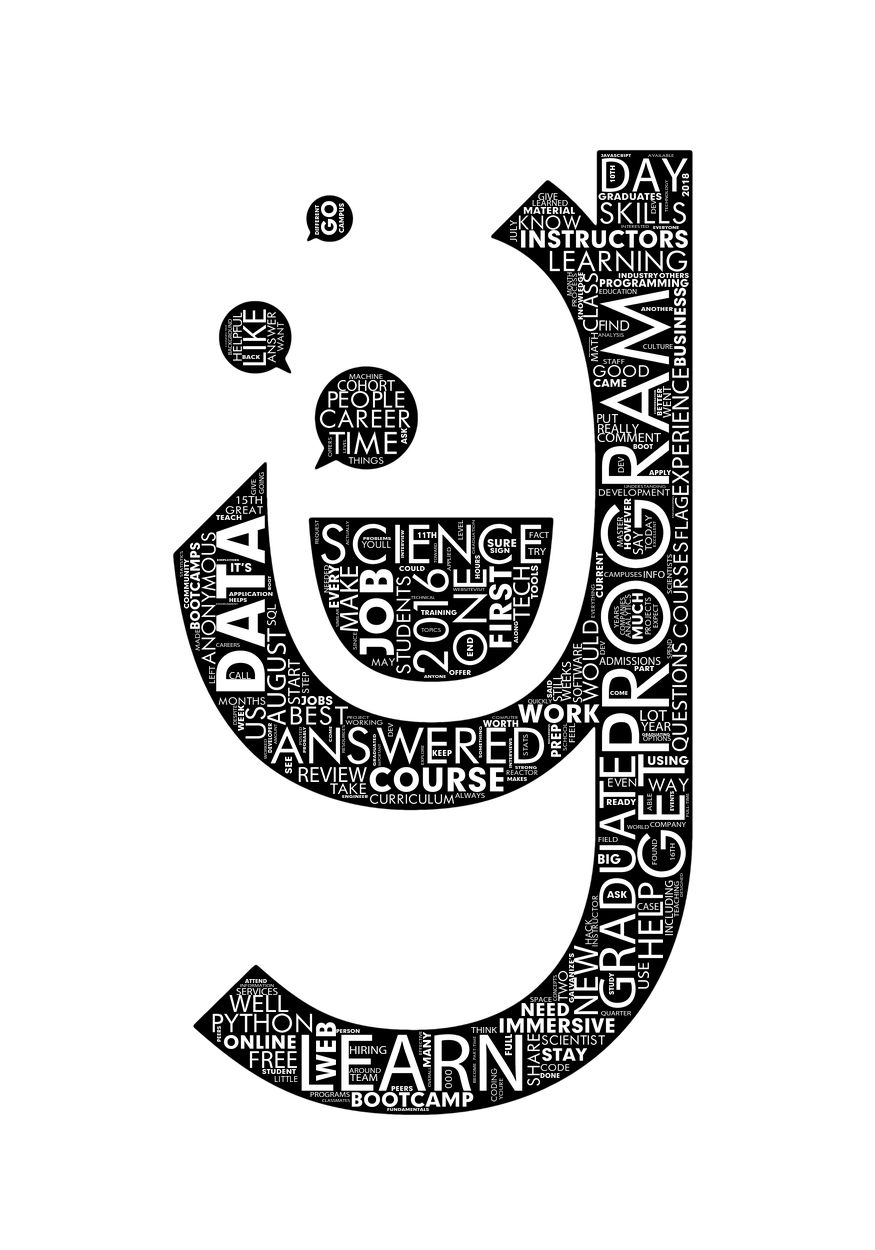

In [278]:
image.mask

Can be rendered in any size with any margins (empty space in the sides, required for printing). Original image size with all 0 margins is default.

In [279]:
image.render(fin_cmap,size=(7000,10000),margins=(0,0,0,0))

In [280]:
image.img

In [281]:
image.img.save('galvanise_1.jpg',quality=90)